In [1]:
# Import other packages for examples
import pandas as pd
import numpy as np
import scipy.sparse as ss

from sklearn.feature_extraction.text import CountVectorizer
from sklearn import datasets

from corextopic import corextopic as ct
from corextopic import vis_topic as vt

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data_df = pd.read_pickle('./pickles/data_clean.pickle')
data_df

,text
ama,tldr do whatever the fuck you want so youre te...
askreddit,victorias secret was originally supposed to be...
dankmemes,meme of the month seeding and nominations for ...
funny,but i wanted the robot ferret haha suck it you...
memes,redditmc is opening staff positions builders h...
science,am i reading this correctly to conclude that t...
worldnews,so was there any posts left after the purge ok...
wsb,after green days in a row wsb wtf where did ...


In [17]:
wsb = data_df[-1:]
wsb

science = data_df[5:6]
science

,text
science,am i reading this correctly to conclude that t...


In [18]:
vectorizer = CountVectorizer(max_features=20000,
                             stop_words='english', token_pattern="\\b[a-z][a-z]+\\b",
                             binary=True, ngram_range=(1,2))

doc_word = vectorizer.fit_transform(science.text)
words = list(np.asarray(vectorizer.get_feature_names())) 

In [19]:
topic_model = ct.Corex(n_hidden=100, words=words, seed=1)
topic_model.fit(doc_word, words=words, docs=science)

In [20]:
tm_layer2 = ct.Corex(n_hidden=10)
tm_layer2.fit(topic_model.labels)

In [21]:
tm_layer3 = ct.Corex(n_hidden=1)
tm_layer3.fit(tm_layer2.labels)

In [22]:
vt.vis_hierarchy([topic_model, tm_layer2, tm_layer3], column_label=words, max_edges=300, prefix='topic-model-example')

weight threshold is 0.000000 for graph with max of 300.000000 edges 
non-isolated nodes,edges 0 0
non-isolated nodes,edges 0 0
Couldn't find 'force.html' file for visualizing d3 output


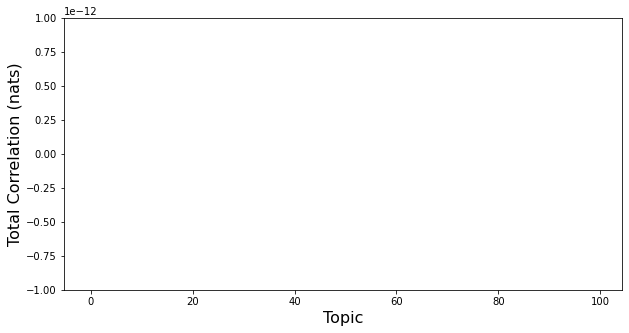

In [23]:
plt.figure(figsize=(10,5))
plt.bar(range(topic_model.tcs.shape[0]), topic_model.tcs, color='#4e79a7', width=0.5)
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Total Correlation (nats)', fontsize=16);

In [24]:
# Print all topics from the CorEx topic model
topics = topic_model.get_topics()
for n,topic in enumerate(topics):
    topic_words,_ = zip(*topic)
    print('{}: '.format(n) + ','.join(topic_words))

0: long abandoned,produce litres,produced lower,profitable usable,project currently,propaganda,properly doing,properly used,properties magic,property terms
1: long adapt,pumped,punishment monetary,purposefully racist,quickly dont,raise meal,random bills,razor,read caveman,read went
2: long gauntlet,proper diagnosis,properties protons,providing evidence,psychiatry,purpose evolution,pushing boundaries,putting existing,question heshe,quickly body
3: long plastic,react exactly,read potato,read table,real life,really change,really literally,really ways,reason mosquitos,reason wont
4: longer tipped,quantum computer,qubit,questioning raceethnicity,questions really,quitting hour,random unlikely,rant month,rapamycin,rates credit
5: look awful,predicting,preexisting,prefer dislike,prefer having,pretty stupid,prety,prevalent chronic,prevent lot,previous understanding
6: long service,problem given,produce hydrogen,progression,prove ones,proven random,provider phone,purifiers room,puts,probably fig

In [26]:
# Print topic docs
top_docs = topic_model.get_top_docs()
for n,topic_docs in enumerate(top_docs):
    docs, probs = zip(*topic_docs)
    print('{}: '.format(n) + ','.join(docs))

0: text
1: text
2: text
3: text
4: text
5: text
6: text
7: text
8: text
9: text
10: text
11: text
12: text
13: text
14: text
15: text
16: text
17: text
18: text
19: text
20: text
21: text
22: text
23: text
24: text
25: text
26: text
27: text
28: text
29: text
30: text
31: text
32: text
33: text
34: text
35: text
36: text
37: text
38: text
39: text
40: text
41: text
42: text
43: text
44: text
45: text
46: text
47: text
48: text
49: text
50: text
51: text
52: text
53: text
54: text
55: text
56: text
57: text
58: text
59: text
60: text
61: text
62: text
63: text
64: text
65: text
66: text
67: text
68: text
69: text
70: text
71: text
72: text
73: text
74: text
75: text
76: text
77: text
78: text
79: text
80: text
81: text
82: text
83: text
84: text
85: text
86: text
87: text
88: text
89: text
90: text
91: text
92: text
93: text
94: text
95: text
96: text
97: text
98: text
99: text


In [11]:
vt.vis_rep(topic_model, column_label=words, prefix='topic-model-example')

Print topics in text file
